### DecisionTree

- [Sklearn Official document URL - DecisionTree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

> class sklearn.tree.DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0)

```python
from sklearn.tree import DecisionTreeClassifier
```

#### Basic Example

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


0.94


findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


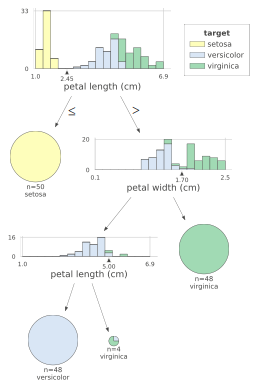

<Figure size 1800x1440 with 0 Axes>

In [1]:
import numpy as np

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from dtreeviz.trees import dtreeviz # remember to load the Visualization package

import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("figure", figsize=(12,10))
sns.set_style("whitegrid")

iris = datasets.load_iris()
X = iris.data
y = iris.target

# 1) Train/Test 데이터 나누고
x_train, x_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=1/3, 
                                                    random_state=255)

# 2) 학습하고
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(x_train, y_train)
# 3) 예측해서 성능을 본다.
print(clf.score(x_test, y_test))
# 4) 결과 Visualization
fig = plt.figure(figsize=(25,20))
viz = dtreeviz(clf, X, y,
                target_name="target",
                feature_names=iris.feature_names,
                class_names=list(iris.target_names))

viz.save("../../images/decision_tree.svg")
viz

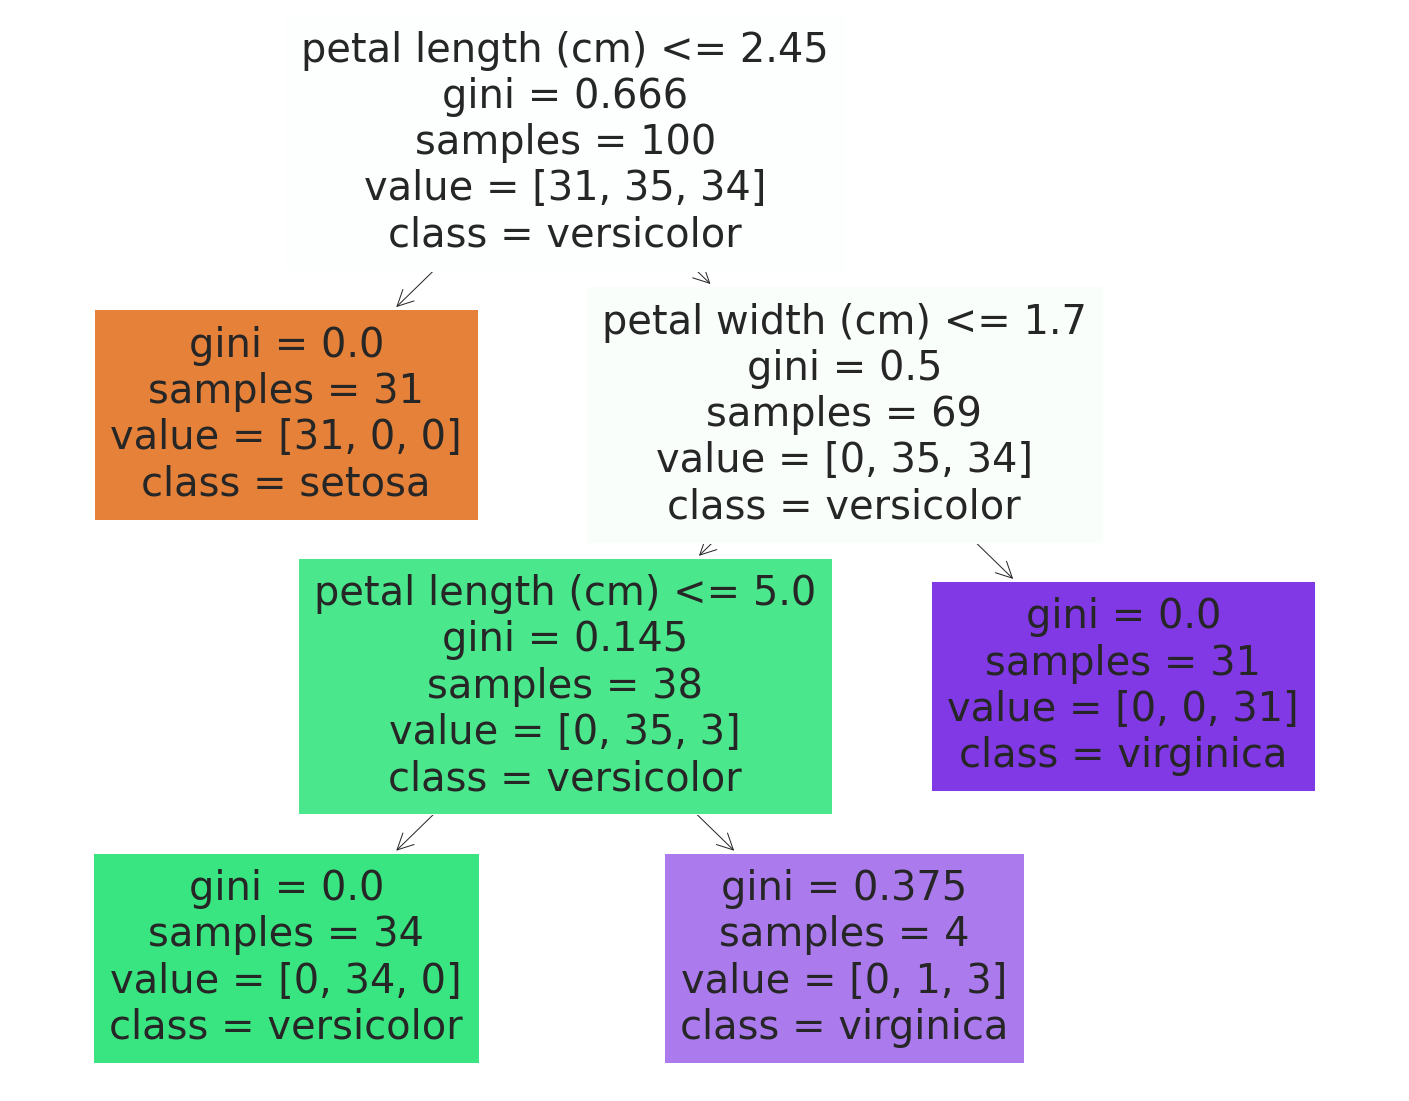

In [4]:
fig = plt.figure(figsize=(25,20))
_ = plot_tree(clf, 
              feature_names=iris.feature_names,  
            class_names=iris.target_names,
              filled=True)
plt.savefig('../../images/tree_visualization.png')

### Bagging Classifier

- [Sklearn Official document URL - BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html)

> class sklearn.ensemble.BaggingClassifier(base_estimator=None, n_estimators=10, *, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=None, random_state=None, verbose=0)

```python
from sklearn.ensemble import BaggingClassifier
```

In [3]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification

# 분류를 위한 임의의 데이터 셋
X, y = make_classification(n_samples=100, n_features=4,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

# 앙상블 구조를 가져갈 기본 분류기를 만든다
knn = KNeighborsClassifier(n_neighbors=5)

# 앙상블 구조를 만든다
clf = BaggingClassifier(base_estimator=knn,
                         n_estimators=10, random_state=0).fit(X, y)

# 예측
clf.predict([[0, 0, 0, 0]])

array([1])

### Voting Classifier

- [Sklearn Official document URL - VotingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html)

> class sklearn.ensemble.VotingClassifier(estimators, *, voting='hard', weights=None, n_jobs=None, flatten_transform=True, verbose=False)

```python
from sklearn.ensemble import VotingClassifier
```

VotingClassifier : Learning multiple different ML models and using them for data prediction
ex) DT+SVM+GNB+KNN

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

# 학습용 데이터
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])

# 앙상블 구조를 만들 3개의 분류기
clf1 = LogisticRegression(multi_class='multinomial', random_state=1)
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

# 앙상블 분류기
eclf1 = VotingClassifier(
    estimators=[
        ('lr', clf1), 
        ('rf', clf2), 
        ('gnb', clf3)
    ], 
    voting='hard')

eclf1 = eclf1.fit(X, y)
print(eclf1.predict(X))

[1 1 1 2 2 2]


### Random Forest

- [Sklearn Official document URL - RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

> class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None)

```python
from sklearn.ensemble import RandomForestClassifier
```

Feature ranking:
1. feature 1 (0.315051)
2. feature 0 (0.214699)
3. feature 2 (0.209859)
4. feature 6 (0.041458)
5. feature 9 (0.038024)
6. feature 3 (0.037885)
7. feature 8 (0.037067)
8. feature 7 (0.036401)
9. feature 5 (0.035074)
10. feature 4 (0.034483)


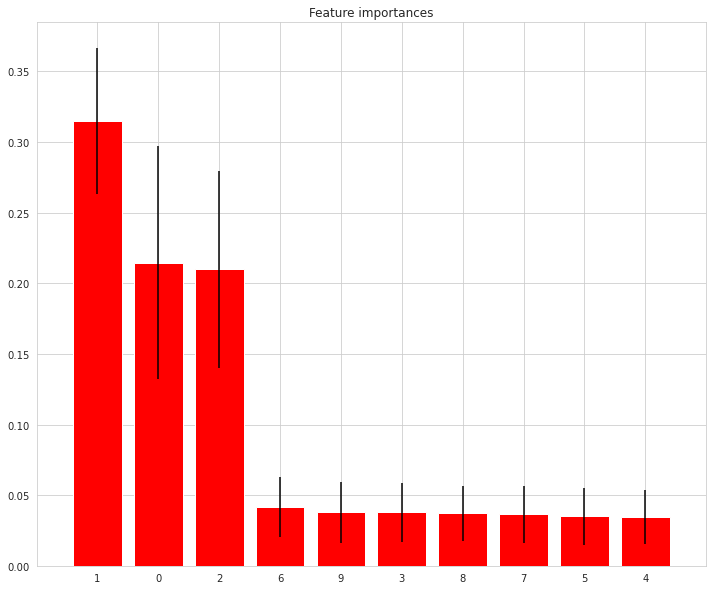

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Build a classification task using 3 informative features
X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=3,
                           n_redundant=0,
                           n_repeated=0,
                           n_classes=2,
                           random_state=0,
                           shuffle=False)

# Build a forest and compute the impurity-based feature importances
forest = RandomForestClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

##### Select feature importance using RF and redesign other models

In [10]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

train = pd.read_csv('titanic/train_preprocessing.csv') # X_train
test = pd.read_csv('titanic/test_preprocessing.csv') # y_train
target = pd.read_csv('titanic/target_preprocessing.csv') # X_tet

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

X = train.to_numpy()[:,1:]
X_test = test.to_numpy()[:,2:]
y = target.to_numpy()[:,1]

# 1) titanic 데이터를 가져오시고
# 2) train 데이터로 train/test 데이터를 나누고
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=1/3,
                                                   random_state=10)

# 3) RF를 이용해서 인자 중요도를 판단하시고,
fi = RandomForestClassifier(n_estimators=100, max_depth=4).fit(X_train,y_train)

# 4) 가장 중요도가 높은 인자를 2~6개까지 차례대로 사용해서, KNN 모델을 학습한뒤 성능을 확인하세요.
print(fi.feature_importances_)
print(np.argsort(fi.feature_importances_))
imp = np.argsort(fi.feature_importances_)

# 5) 그중 가장 좋은 성능을 갖는 인자의 갯수의 모델로, 실제 test를 이용해서 결과를 도출하시고
for i in range(2,5) :
    X_train_imp = X_train[:,imp[-i:]]
    X_test_imp = X_test[:,imp[-i:]]
    print(i,"개의 피처를 사용했을때 성능 :",KNeighborsClassifier(n_neighbors=5).fit(X_train_imp, y_train).score(X_test_imp,y_test))
    
clf = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)
clf.score(X_test, y_test)

[0.11014924 0.27851553 0.03551263 0.05573333 0.09515875 0.03471661
 0.30710637 0.08310754]
[5 2 3 7 4 0 1 6]
2 개의 피처를 사용했을때 성능 : 0.7946127946127947
3 개의 피처를 사용했을때 성능 : 0.8013468013468014
4 개의 피처를 사용했을때 성능 : 0.7878787878787878


0.8249158249158249

### Make Ensemble Structure

In [13]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import MinMaxScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import *

train = pd.read_csv('titanic/train_preprocessing.csv') # X_train
test = pd.read_csv('titanic/test_preprocessing.csv') # y_train
target = pd.read_csv('titanic/target_preprocessing.csv') # X_tet

train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

X = train.to_numpy()[:,1:]
X_test = test.to_numpy()[:,2:] # <- 케글 제출용
y = target.to_numpy()[:,1]

# 1)titanic 데이터 셋으로 
# 2) train/test 데이터 셋을 나누시고
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=1/3,
                                                   random_state=5)

# 3) LDA + decision tree 의 구조의 pipeline classifer를 만드시고
lda, dt = LDA(), DecisionTreeClassifier(max_depth=4)
clf = Pipeline([('lda',lda),('dt',dt)])

# 4) 이걸 100개의 bagging classifer로 만드셔서
bag_clf = BaggingClassifier(base_estimator=clf,
                            n_estimators=100,
                           random_state=0).fit(X_train,y_train)
# 5) 1차검증하시고
print(bag_clf.score(X_test,y_test))

0.8215488215488216


In [15]:
# 1)titanic 데이터 셋으로 
# 2) train/test 데이터 셋을 나누시고
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   test_size=1/3,
                                                   random_state=5)

# 3) LDA + decision tree 의 구조의 pipeline classifer를 만드시고
# 4) PCA + KNN의 pipeline 구조를 만드시고
# 5) MinMaxScalar + GNB pipeline 구조를 만드시고
lda, pca, scalar = LDA(), PCA(n_components=1), MinMaxScaler()
dt, knn, gnb = DecisionTreeClassifier(max_depth=4), KNeighborsClassifier(n_neighbors=5),GaussianNB()

clf1 = Pipeline([('scalar', scalar),('dt',dt)])
clf2 = Pipeline([('pca', pca),('knn',knn)])
clf3 = Pipeline([('scalar', scalar), ('gnb',gnb)])

# 6) 이걸 voting classifer로 만드셔서
clf = VotingClassifier([('clf1', clf1),('clf2', clf2),('clf3', clf3)],
                      voting='hard').fit(X_train, y_train)

# 7) 1차검증하시고
print(clf.score(X_test,y_test))

0.8249158249158249
